In [36]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans_scratch import KMeansAlgorithm

In [37]:
"""
Load csv into pandas dataframe
"""

flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,subdistrict_name,lat_long,avg_demand_baseline,demand_target
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,"-6.13727,106.7153587",57,85.5
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,"-6.1385859,106.7293052",33,49.5
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,"-6.1715044,106.7056503",25,37.5
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,"-6.1613339,106.7294525",40,60.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,"-6.159495,106.7897422",153,229.5
...,...,...,...,...,...,...,...
185,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,"-6.1852948,106.8073138",45,67.5
186,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,"-6.2076699,106.8075363",240,360.0
187,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,"-6.1906249,106.8072637",99,148.5
188,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,"-6.1968299,106.8074788",37,55.5


In [38]:
"""
split data lat_long into each lat and long it self.
"""

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name','subdistrict_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479


In [39]:
"""
Seharusnya disini bakal ada setting untuk pembobotan centroid
"""
demand_target_data = dataset['demand_target'].tolist()
#demand_target_data = None

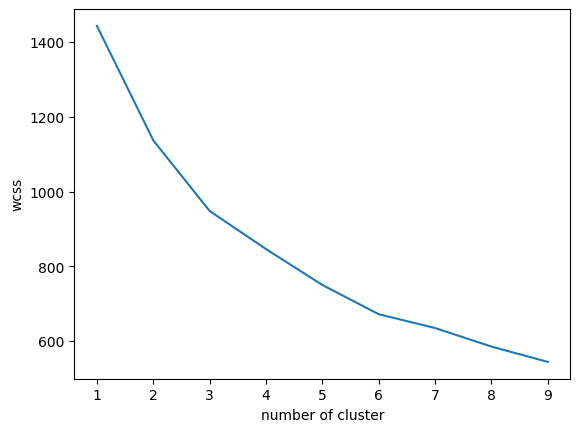

In [40]:
"""
Elbow method to determine number of cluster
"""
iterate_range = 10
wcss = []
for i in range(1, iterate_range):
    kmeans = KMeansAlgorithm(dataset, i, 'lat', 'long', demand_target_data)
    kmeans.fit(250)
    wcss.append(kmeans.get_wcss())

plt.plot(range(1, iterate_range), wcss)
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [41]:
n_cluster = 6
kmeans = KMeansAlgorithm(dataset, n_cluster, 'lat', 'long', demand_target_data)
kmeans.fit(250)
pred = kmeans.predict()
dataset = dataset.assign(pred=pred)
dataset

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359,4
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305,4
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650,4
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452,4
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742,2
...,...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314,2
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536,2
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264,2
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479,2


In [42]:
centroid_points = kmeans.centroid
print(centroid_points)

[(-6.245145863662434, 106.77361181020075), (-6.302026415441672, 106.84190885441672), (-6.1726953462446374, 106.81199117033262), (-6.226504131401617, 106.86042442318059), (-6.148115492642789, 106.7262687948693), (-6.17014735312869, 106.8697856118064)]


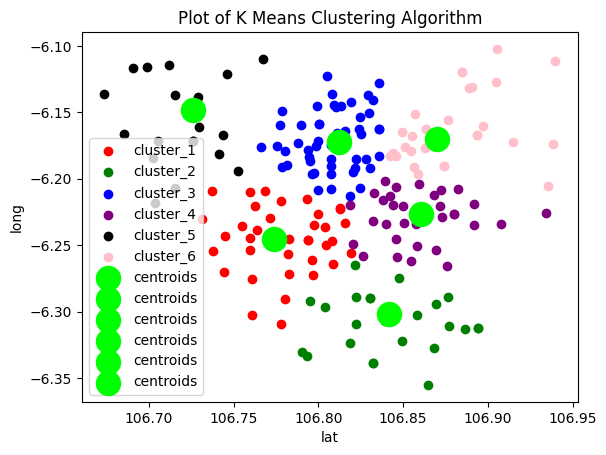

In [43]:
"""
Plotting result
"""
kmeans.visualize_kmeans()